Check the correlation between condensability and nucleosome occupancy

In [1]:
# python modules
import random
import re
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
# custom modules
import graphics_edit as graphics

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
# custom modules
import load_file_edit as load_file

In [5]:
path = "./data/"

In [6]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

In [7]:
### set data information (fname/field) and key
path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/'

dinfo_dkey = {'H1_NCP_sp_1rep_deep_chr1_score.gtab.gz':
              {'H1_NCP_sp_8_1rep_deep': ('H1', 'score', 8)},
              'H1_NCP_sp_0_1rep_deep_chr1_num.gtab.gz':
              {'H1_NCP_sp_0_1rep_deep': ('H1', 'num', 0)},
              'H1_NCP_sp_8_1rep_deep_chr1_num.gtab.gz':
              {'H1_NCP_sp_8_1rep_deep': ('H1', 'num', 8)},
              }

In [8]:
### load gtab file
dkey_ID_value = {}
for fkey in dinfo_dkey:
    field_dkey = dinfo_dkey[fkey]
    for fname in glob.glob(path + '*'):
        if not re.match(fkey, fname.rsplit('/')[-1]):
            continue
        print "loading %s" % (fname.rsplit('/')[-1])
        field_ID_value = load_file.read_gtab(fname,
                                                 mode='col',
                                                 field_choices=field_dkey.keys())

        for field, dkey in field_dkey.items():
            ID_value = field_ID_value[field]

            if dkey not in dkey_ID_value:
                dkey_ID_value[dkey] = {}
            dkey_ID_value[dkey].update(ID_value)

loading H1_NCP_sp_1rep_deep_chr1_score.gtab.gz


loading H1_NCP_sp_0_1rep_deep_chr1_num.gtab.gz


loading H1_NCP_sp_8_1rep_deep_chr1_num.gtab.gz


In [9]:
### get common IDs
dkeys = sorted(dkey_ID_value.keys())
ID_list = set([])
for i in range(len(dkeys)):
    dkey = dkeys[i]
    ID_value = dkey_ID_value[dkey]
    if i == 0:
        ID_list |= set(ID_value.keys())
        continue
    ID_list &= set(ID_value.keys())
ID_list = sorted(list(ID_list))
    

In [10]:
### plot scatter plot
X = [dkey_ID_value[('H1', 'num', 0)][ID] for ID in ID_list]
Y = [dkey_ID_value[('H1', 'num', 8)][ID] for ID in ID_list]
Z = [dkey_ID_value[('H1', 'score', 8)][ID] for ID in ID_list]


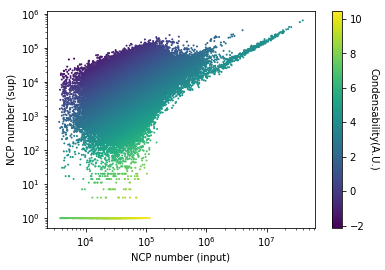

In [11]:
fig = plt.figure()
plt.scatter(np.asarray(X)+1,
            np.asarray(Y)+1,
            c=Z,
            s=1)
plt.xscale("log", basex=10)
plt.yscale("log", basey=10)
plt.xlabel("NCP number (input)")
plt.ylabel("NCP number (sup)")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Condensability(A.U.)",
                   rotation=-90,
                   va="bottom")
plt.show()
plt.close()